In [12]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set GPU memory growth for each GPU
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Limit GPU memory usage to 60% of total memory
        for gpu in gpus:
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=0.6)])
        
        # Your model training code goes here
        
    except RuntimeError as e:
        print(e)


In [13]:
import tensorflow as tf
import os
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [14]:
folder_path = "C:\Thesis\Plantvillageextended"

for folder_name in os.listdir(folder_path):
    folder = os.path.join(folder_path, folder_name)
    if os.path.isdir(folder):
        image_count = sum(
            1 for file_name in os.listdir(folder)
            if os.path.isfile(os.path.join(folder, file_name))
            and file_name.lower().endswith((".jpg", ".jpeg", ".png", ".gif"))
        )
        print(f"Folder '{folder_name}' contains {image_count} images.")


Folder 'Apple_Black Rot' contains 100 images.
Folder 'Apple_Ceda Rust' contains 100 images.
Folder 'Apple_Healthy' contains 100 images.
Folder 'Apple__Scab' contains 100 images.
Folder 'Cherry_Healthy' contains 100 images.
Folder 'Cherry_Powdery Mildew' contains 100 images.
Folder 'Corn_Cercospora Leaf Spot' contains 100 images.
Folder 'Corn_Common Rust' contains 100 images.
Folder 'Corn_Healthy' contains 100 images.
Folder 'Corn_Northern Leaf Blight' contains 100 images.
Folder 'Grape_Black Rot' contains 100 images.
Folder 'Grape_Esca (Black Measles)' contains 100 images.
Folder 'Grape_Healthy' contains 100 images.
Folder 'Grape_Leaf Blight' contains 100 images.
Folder 'Peach_Bacterial Spot' contains 100 images.
Folder 'Peach_Healthy' contains 100 images.
Folder 'Pepper__bell___Bacterial_spot' contains 100 images.
Folder 'Pepper__bell___healthy' contains 100 images.
Folder 'Potato___Early_blight' contains 100 images.
Folder 'Potato___healthy' contains 100 images.
Folder 'Potato___Late

In [15]:
#class_count = len([name for name in os.listdir( "C:\Thesis\Plantvillageextended") if os.path.isdir(os.path.join(dataset_dir, name))])


In [16]:
#class_count

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [18]:
BATCH_SIZE = 16
IMAGE_SIZE = (224, 224)
CHANNELS = 3
EPOCHS = 10

In [19]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [20]:
train_generator = datagen.flow_from_directory(
    'C:/Thesis/Shrinked_data2',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='sparse',  # Update this line
    subset='training'
)


Found 6109 images belonging to 33 classes.


In [21]:
validation_generator = datagen.flow_from_directory(
    'C:/Thesis/Shrinked_data2',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    class_mode='sparse',  # Update this line
    subset='validation'
)


Found 1524 images belonging to 33 classes.


In [39]:
base_model  = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
n_classes = 33

In [40]:
for layer in base_model.layers:
    layer.trainable = False

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
num_classes = 33
from tensorflow.keras.optimizers import SGD


In [42]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [2]:
#model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])



In [3]:
#model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [45]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [93]:
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)


Epoch 1/15
425/425 [==============================] - 1182s 3s/step - loss: 1.3944 - accuracy: 0.5789 - val_loss: 0.7418 - val_accuracy: 0.7509
Epoch 2/15
425/425 [==============================] - 1236s 3s/step - loss: 0.6476 - accuracy: 0.7804 - val_loss: 0.6546 - val_accuracy: 0.7774
Epoch 3/15
425/425 [==============================] - 1256s 3s/step - loss: 0.4884 - accuracy: 0.8284 - val_loss: 0.4881 - val_accuracy: 0.8347
Epoch 4/15
425/425 [==============================] - 1274s 3s/step - loss: 0.4344 - accuracy: 0.8507 - val_loss: 0.4801 - val_accuracy: 0.8253
Epoch 5/15
425/425 [==============================] - 1238s 3s/step - loss: 0.4094 - accuracy: 0.8556 - val_loss: 0.4831 - val_accuracy: 0.8489
Epoch 6/15
425/425 [==============================] - 1208s 3s/step - loss: 0.3631 - accuracy: 0.8761 - val_loss: 0.3214 - val_accuracy: 0.8837
Epoch 7/15
425/425 [==============================] - 1163s 3s/step - loss: 0.3175 - accuracy: 0.8853 - val_loss: 0.3659 - val_accuracy:

In [95]:
history

In [98]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 425}

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [100]:
history.history['loss'][:5] # show loss for first 5 epochs


[1.3944453001022339,
 0.6476125121116638,
 0.4883731007575989,
 0.43436846137046814,
 0.40935441851615906]

Text(0.5, 1.0, 'Training and Validation Accuracy')

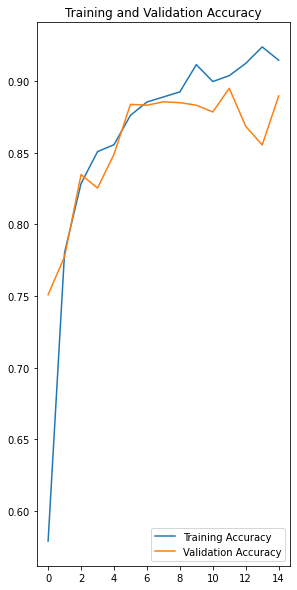

In [101]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

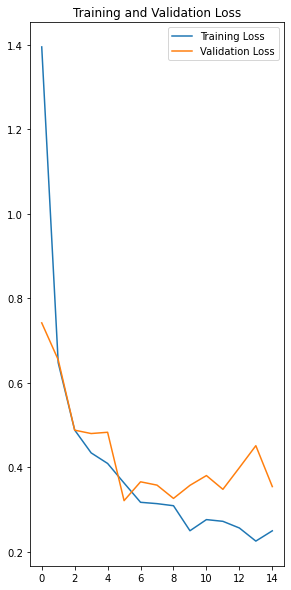

In [102]:
plt.figure(figsize=(10, 10))
EPOCHS = len(loss) # or len(val_loss)
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [10]:
test_data_dir = 'C:\Thesis\Test_data'
target_size = (224, 224)
batch_size = 16

In [23]:
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalizing pixel values to [0, 1]


In [24]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=target_size,
    batch_size=batch_size,
    shuffle=False,  
    class_mode='sparse'
)

Found 846 images belonging to 33 classes.


In [108]:
test_loss, test_accuracy = model.evaluate(test_generator)


27/27 [==============================] - 108s 4s/step - loss: 0.1526 - accuracy: 0.9492


In [109]:
test_accuracy

0.9491725564002991

In [112]:
y_true = test_generator.classes


In [159]:
from sklearn.metrics import classification_report
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1) 
report = classification_report(y_true, y_pred)


27/27 [==============================] - 108s 4s/step


In [166]:
class_mapping = {
    0: 'Apple_Black_Rot',
    1: 'Apple_Cedar_Rust',
    2: 'Apple_Healthy',
    3: 'Apple_Scab',
    4: 'Cherry_Healthy',
    5: 'Cherry_Powdery_Mildew',
    6: 'Corn_Cercospora_Leaf_Spot',
    7: 'Corn_Common_Rust',
    8: 'Corn_Healthy',
    9: 'Corn_Northern_Leaf_Blight',
    10: 'Grape_Black_Rot',
    11: 'Grape_Esca_Black_Measles',
    12: 'Grape_Healthy',
    13: 'Grape_Leaf_Blight',
    14: 'Peach_Bacterial_Spot',
    15: 'Peach_Healthy',
    16: 'Pepper_bell_Bacterial_spot',
    17: 'Pepper_bell_healthy',
    18: 'Potato_Early_blight',
    19: 'Potato_Late_blight',
    20: 'Potato_healthy',
    21: 'Rice_Bacterial_leaf_blight',
    22: 'Rice_Brown_spot',
    23: 'Rice_Leaf_smut',
    24: 'Strawberry_Healthy',
    25: 'Strawberry_Leaf_Scorch',
    26: 'Tomato_Bacterial_spot',
    27: 'Tomato_Early_blight',
    28: 'Tomato_Late_blight',
    29: 'Tomato_Leaf_Mold',
    30: 'Wheat_Healthy',
    31: 'Wheat_Septoria',
    32: 'Wheat_Stripe_Rust'
}

precision = [1.00, 0.97, 0.91, 0.94, 1.00, 0.91, 0.94, 1.00, 1.00, 0.97, 1.00, 0.73, 1.00, 0.97, 1.00, 1.00, 0.83, 1.00, 1.00, 0.97, 0.88, 1.00, 1.00, 1.00, 1.00, 1.00, 0.97, 0.88, 1.00, 0.86, 1.00, 1.00, 1.00]
recall = [0.93, 0.97, 0.97, 0.97, 1.00, 1.00, 0.97, 1.00, 1.00, 0.93, 0.63, 1.00, 0.97, 1.00, 0.93, 0.93, 1.00, 0.83, 0.93, 0.93, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 0.93, 0.73, 1.00, 1.00, 1.00, 1.00, 1.00]
f1_score = [0.97, 0.97, 0.94, 0.95, 1.00, 0.95, 0.95, 1.00, 1.00, 0.95, 0.78, 0.85, 0.98, 0.98, 0.97, 0.97, 0.91, 0.91, 0.97, 0.95, 0.94, 1.00, 1.00, 1.00, 1.00, 1.00, 0.98, 0.90, 0.85, 0.92, 1.00, 1.00, 1.00, 1.00]
support = [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 15, 4, 4, 4, 30, 30, 30, 30, 30, 30, 10, 9, 20]

import pandas as pd

class_names = [class_mapping[i] for i in range(len(precision))]

table_data = []
for i in range(len(precision)):
    table_data.append([class_names[i], precision[i], recall[i], f1_score[i], support[i]])

Classification_Metrics = pd.DataFrame(table_data, columns=['Class', 'Precision', 'Recall', 'F1-Score', 'Support'])

Classification_Metrics


,Class,Precision,Recall,F1-Score,Support
0,Apple_Black_Rot,1.00,0.93,0.97,30
1,Apple_Cedar_Rust,0.97,0.97,0.97,30
2,Apple_Healthy,0.91,0.97,0.94,30
3,Apple_Scab,0.94,0.97,0.95,30
4,Cherry_Healthy,1.00,1.00,1.00,30
5,Cherry_Powdery_Mildew,0.91,1.00,0.95,30
6,Corn_Cercospora_Leaf_Spot,0.94,0.97,0.95,30
7,Corn_Common_Rust,1.00,1.00,1.00,30
8,Corn_Healthy,1.00,1.00,1.00,30
9,Corn_Northern_Leaf_Blight,0.97,0.93,0.95,30


In [78]:
#Classification_Metrics

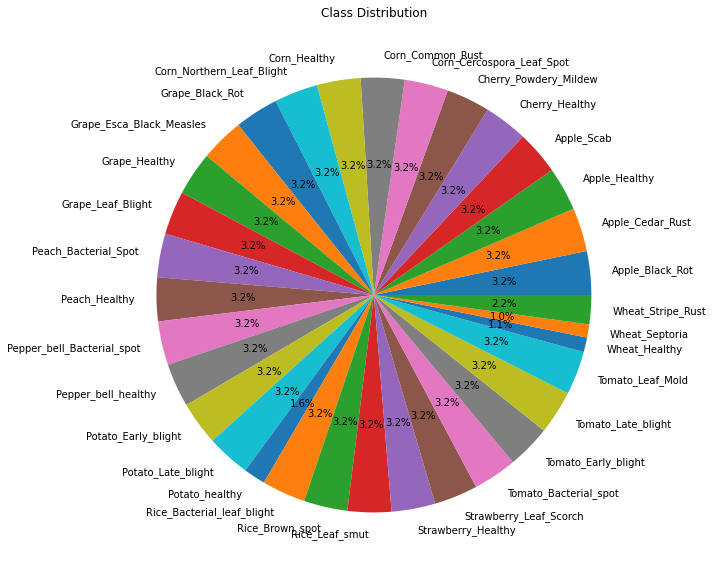

In [168]:
# Plotting Class Distribution
plt.figure(figsize=(10, 10))
plt.pie(df['Support'], labels=df['Class'], autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()


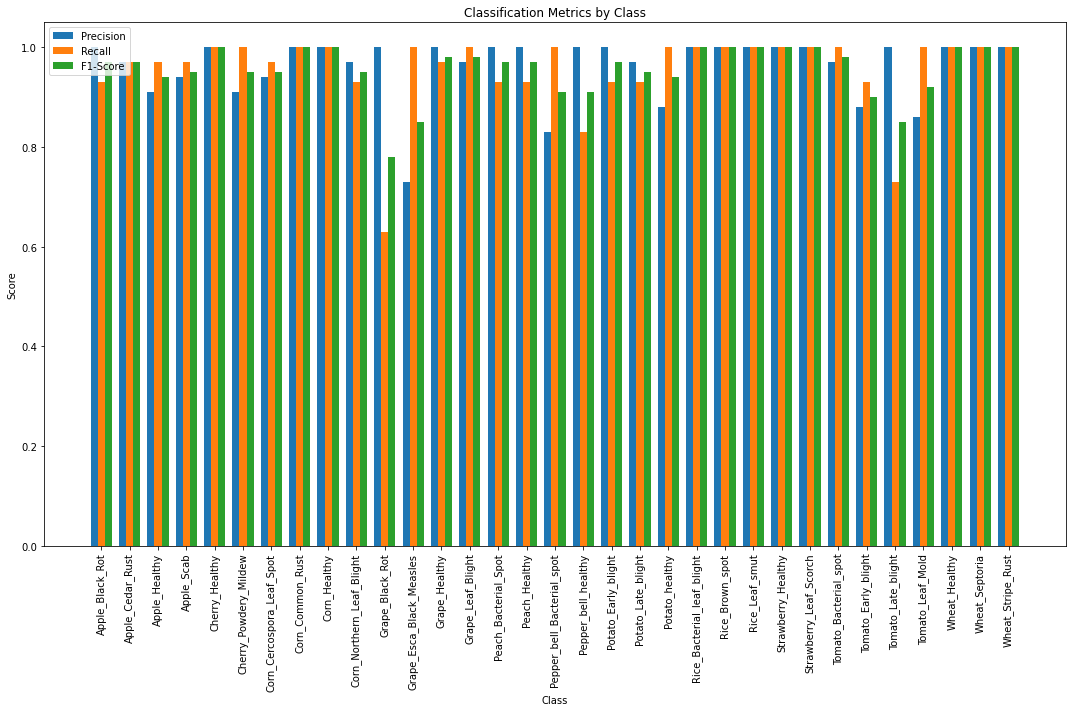

In [170]:
import numpy as np

# Grouped Bar Plot for Precision, Recall, and F1-Score
labels = df['Class']
metrics = ['Precision', 'Recall', 'F1-Score']
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width, df['Precision'], width, label='Precision')
rects2 = ax.bar(x, df['Recall'], width, label='Recall')
rects3 = ax.bar(x + width, df['F1-Score'], width, label='F1-Score')

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Classification Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()

fig.tight_layout()
plt.show()


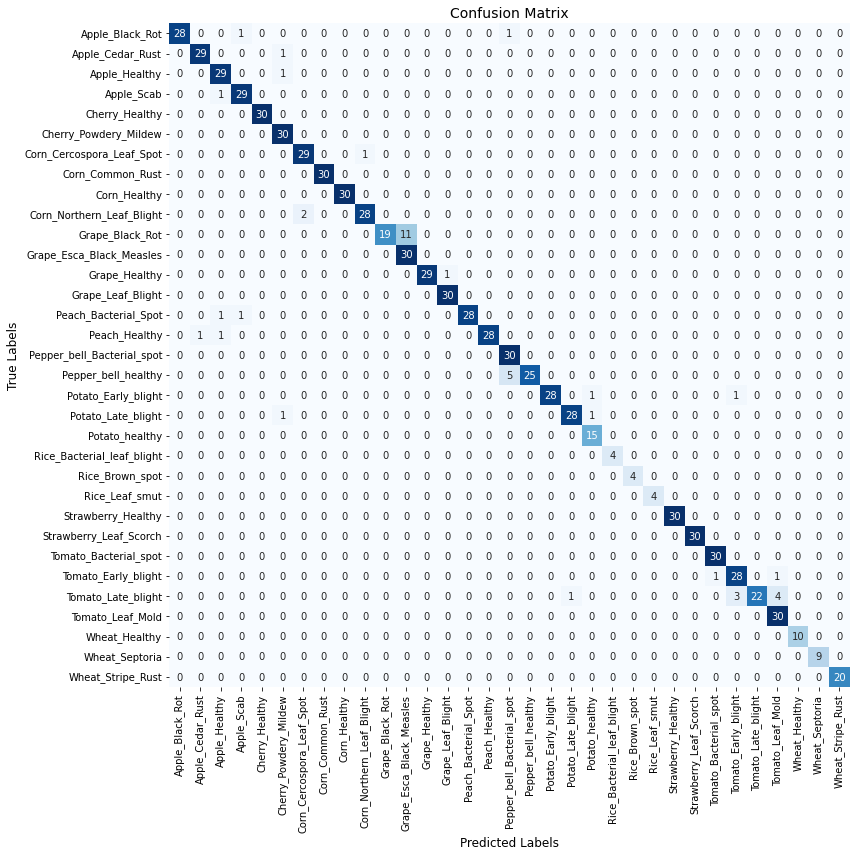

In [177]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, ax=ax)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
ax.set_xticklabels(class_names, rotation=90, ha='center')
ax.set_yticklabels(class_names, rotation=0, va='center')

plt.tight_layout()
plt.show()
